### Import Library

In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


### 準備資料

In [2]:
#取得keras Dateset
(x_img_train, y_label_train),(x_img_test, y_label_test) = cifar10.load_data()

In [3]:
#確認資料維度
print('train data:', 'images:',x_img_train.shape,
     'labels:',y_label_train.shape)
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3) labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [4]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

### 建立模型

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D \
,MaxPooling2D, ZeroPadding2D

In [6]:
model = Sequential()

In [7]:
#捲積層1
model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(32, 32, 3),activation='relu',padding='same'))

model.add(Dropout(rate=0.25))

model.add(MaxPooling2D(pool_size=(2,2)))

In [8]:
#捲積層2與池化層2
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

model.add(Dropout(rate=0.25))

model.add(MaxPooling2D(pool_size=(2,2)))

In [9]:
#建立神經網路(平坦層、隱藏層、輸出層)
model.add(Flatten())
model.add(Dropout(rate=0.25))

model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

model.add(Dense(10, activation='softmax'))

In [10]:
#檢查model的stack
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
__________

### 載入之前模型

In [11]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


In [12]:
#視覺化模型
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

### 訓練模型

In [13]:
#使用binary_crossentropy
from keras import losses
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
train_history = model.fit(x_img_train_normalize, y_label_train_OneHot,validation_split=0.2,epochs=10, batch_size=16, verbose=1)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 62s 2ms/step - loss: 0.3100 - acc: 0.9001 - val_loss: 0.2972 - val_acc: 0.9000
Epoch 2/10
40000/40000 [==============================] - 56s 1ms/step - loss: 0.2851 - acc: 0.9009 - val_loss: 0.2830 - val_acc: 0.9003
Epoch 3/10
40000/40000 [==============================] - 57s 1ms/step - loss: 0.2702 - acc: 0.9025 - val_loss: 0.2707 - val_acc: 0.9006
Epoch 4/10
40000/40000 [==============================] - 56s 1ms/step - loss: 0.2565 - acc: 0.9049 - val_loss: 0.2588 - val_acc: 0.9013
Epoch 5/10
40000/40000 [==============================] - 56s 1ms/step - loss: 0.2463 - acc: 0.9070 - val_loss: 0.2498 - val_acc: 0.9028
Epoch 6/10
40000/40000 [==============================] - 56s 1ms/step - loss: 0.2385 - acc: 0.9091 - val_loss: 0.2436 - val_acc: 0.9043
Epoch 7/10
40000/40000 [==============================] - 63s 2ms/step - loss: 0.2311 - acc: 0.9110 - val_loss: 0.2377 - val_acc

In [14]:
#使用MSE
from keras import losses
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])
train_history = model.fit(x_img_train_normalize, y_label_train_OneHot,validation_split=0.2,epochs=10, batch_size=16, verbose=1)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 69s 2ms/step - loss: 0.0618 - acc: 0.5198 - val_loss: 0.0636 - val_acc: 0.5430
Epoch 2/10
40000/40000 [==============================] - 67s 2ms/step - loss: 0.0612 - acc: 0.5252 - val_loss: 0.0628 - val_acc: 0.5513
Epoch 3/10
40000/40000 [==============================] - 66s 2ms/step - loss: 0.0608 - acc: 0.5288 - val_loss: 0.0629 - val_acc: 0.5450
Epoch 4/10
40000/40000 [==============================] - 66s 2ms/step - loss: 0.0603 - acc: 0.5350 - val_loss: 0.0625 - val_acc: 0.5523
Epoch 5/10
40000/40000 [==============================] - 66s 2ms/step - loss: 0.0600 - acc: 0.5348 - val_loss: 0.0622 - val_acc: 0.5586
Epoch 6/10
40000/40000 [==============================] - 64s 2ms/step - loss: 0.0597 - acc: 0.5430 - val_loss: 0.0617 - val_acc: 0.5590
Epoch 7/10
40000/40000 [==============================] - 67s 2ms/step - loss: 0.0592 - acc: 0.5456 - val_loss: 0.0613 - val_acc

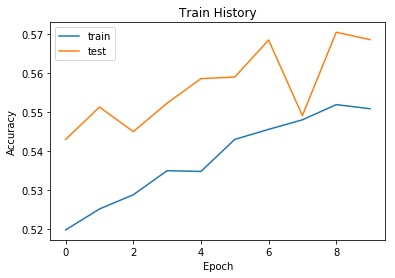

None


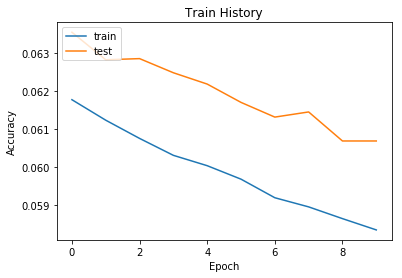

None


In [17]:
print(show_train_history('acc','val_acc'))
print(show_train_history('loss','val_loss'))